In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime

# set total capacity in MW
cap = 25

# import and rearange data
df_raw = pd.read_excel (r'C:\Users\Connor Trewhella\Documents\3YP\ninja_pv_45_1kW.xlsx')
df_useful = df_raw.tail(8760)
df_useful.reset_index(inplace=True)
df_useful = df_useful.rename(columns={'# Renewables.ninja Solar PV (Point API) - 51.658': 'Datetime', 'Unnamed: 2': 'Power (MW)'})
df_useful["Power (MW)"] = df_useful["Power (MW)"] * cap

# get hourly power
df_pwr_hourly = df_useful[["Datetime", "Power (MW)"]]      # note: this is also hourly energy (kWh)
#df_pwr_hourly.set_index(pd.to_datetime(df_pwr_hourly['Datetime']))

# get daily energy
df_energy_daily = df_pwr_hourly.groupby(pd.Grouper(key='Datetime', freq='1D')).sum().reset_index()
df_energy_daily = df_energy_daily.rename(columns={'Power (MW)': 'Energy (MWh)'})

In [3]:
df_pwr_hourly

,Datetime,Power (MW)
0,2019-01-01 00:00:00,0
1,2019-01-01 01:00:00,0
2,2019-01-01 02:00:00,0
3,2019-01-01 03:00:00,0
4,2019-01-01 04:00:00,0
...,...,...
8755,2019-12-31 19:00:00,0
8756,2019-12-31 20:00:00,0
8757,2019-12-31 21:00:00,0
8758,2019-12-31 22:00:00,0


In [11]:
df_pwr_hourly

,Datetime,Power (MW)
0,2019-01-01 00:00:00,0
1,2019-01-01 01:00:00,0
2,2019-01-01 02:00:00,0
3,2019-01-01 03:00:00,0
4,2019-01-01 04:00:00,0
...,...,...
8755,2019-12-31 19:00:00,0
8756,2019-12-31 20:00:00,0
8757,2019-12-31 21:00:00,0
8758,2019-12-31 22:00:00,0


In [29]:
# save data
df_energy_daily.to_csv('Daily_Solar_Generation.csv')

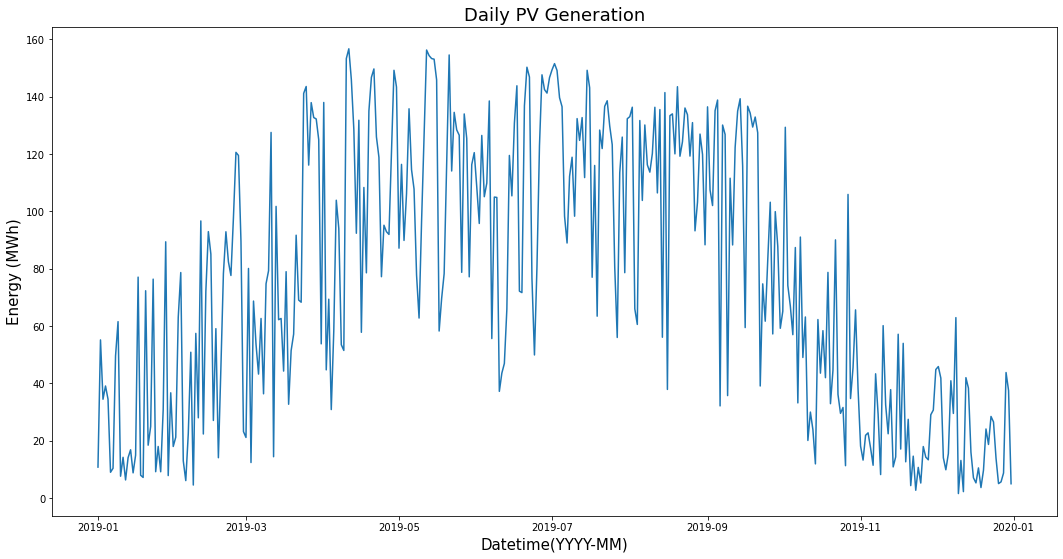

In [4]:
# plot daily energy
plt.figure(figsize=(18,9))
plt.plot(df_energy_daily['Datetime'],df_energy_daily['Energy (MWh)'])
plt.xlabel('Datetime(YYYY-MM)',fontsize=15)
plt.ylabel('Energy (MWh)',fontsize=15)
plt.title('Daily PV Generation',fontsize=18)
plt.show()

In [18]:
# find average daily profile over november and december and average daily profile over june and july

# set new data sets
df_sum = df_pwr_hourly[(df_pwr_hourly['Datetime'] >= pd.to_datetime('2019-06-01 00:00:00')) & (df_pwr_hourly['Datetime'] < pd.to_datetime('2019-08-01 00:00:00'))].reset_index()
df_win = df_pwr_hourly[(df_pwr_hourly['Datetime'] >= pd.to_datetime('2019-11-01 00:00:00')) & (df_pwr_hourly['Datetime'] <= pd.to_datetime('2019-12-31 23:59:59'))].reset_index()

df_sum = df_sum[["Datetime", "Power (MW)"]]
#pd.to_datetime(df_sum_avg.Datetime, format='%Y-%m-%d %H:%M:%S')
#df_sum_avg.set_index('Datetime')
df_win = df_win[["Datetime", "Power (MW)"]]

df_avg_data = [df_sum["Power (MW)"], df_win["Power (MW)"]]
#df_sum_avg = df_sum_avg.groupby(pd.Grouper(key='Datetime', freq='1H')).sum()
#df_sum_avg.groupby([pd.Grouper(key='Datetime', freq='1D'), pd.grouper(key='Datetime', freq'1H).mean()])
#df_sum_avg.groupby([df_sum_avg["Datetime"].dt.year, df_sum_avg["Datetime"].dt.hour]).mean()

#df_avg_days = df_pwr_hourly[(df_pwr_hourly['Datetime'] >= pd.to_datetime('2019-06-01 00:00:00')) & (df_pwr_hourly['Datetime'] < pd.to_datetime('2019-06-02 00:00:00'))].reset_index()
#f_avg_days = df_avg_days[["Datetime"]]
df_avg_days = ['Winter Energy (MWh)', 'Summer Energy (MWh)']

In [13]:
df_sum.head(30)

,Datetime,Power (MW)
0,2019-06-01 00:00:00,0
1,2019-06-01 01:00:00,0
2,2019-06-01 02:00:00,0
3,2019-06-01 03:00:00,0
4,2019-06-01 04:00:00,0.2
5,2019-06-01 05:00:00,1.3
6,2019-06-01 06:00:00,3.525
7,2019-06-01 07:00:00,7.35
8,2019-06-01 08:00:00,11.275
9,2019-06-01 09:00:00,14.6


In [20]:
# max daily energy and date
max_daily = df_energy_daily["Energy (MWh)"].max()
max_daily

df_energy_daily.loc[df_energy_daily['Energy (MWh)'].idxmax()]

Datetime        2019-04-11 00:00:00
Energy (MWh)                  156.7
Name: 100, dtype: object

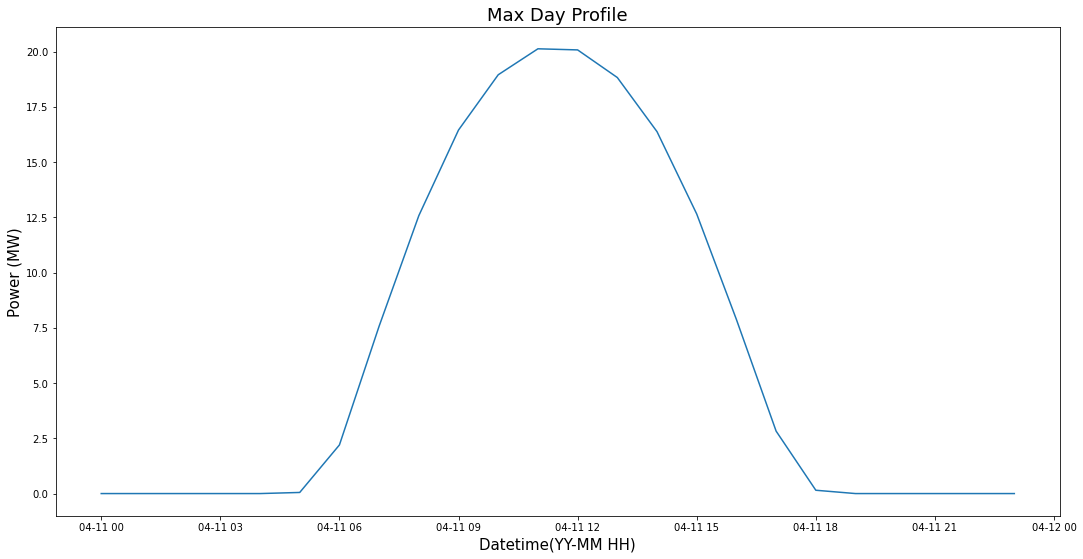

In [26]:
# print maximum daily profile

df_max_day = df_pwr_hourly[(df_pwr_hourly['Datetime'] >= pd.to_datetime('2019-04-11 00:00:00')) & (df_pwr_hourly['Datetime'] < pd.to_datetime('2019-04-12 00:00:00'))].reset_index()
df_max_day = df_max_day[["Datetime", "Power (MW)"]]

plt.figure(figsize=(18,9))
plt.plot(df_max_day['Datetime'],df_max_day['Power (MW)'])
plt.xlabel('Datetime(YY-MM HH)',fontsize=15)
plt.ylabel('Power (MW)',fontsize=15)
plt.title('Max Day Profile',fontsize=18)
plt.show()
